# Load Part 1 Model

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap

In [16]:
# Load the dataset from the local CSV file
df = pd.read_csv('House Price India.csv')

# Data Preprocessing
# Selecting the features and target
X = df[['living area', 'number of bedrooms', 'number of bathrooms', 
        'grade of the house', 'Area of the house(excluding basement)', 
        'Built Year', 'waterfront present']]  # Corrected the column name to 'Built Year'

y = df['Price']

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Optional for XGBoost, but good practice for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 41801773842.97
Root Mean Squared Error (RMSE): 204454.82
R-squared: 0.72


### **Step 1: Error Analysis Conclusions & Work Plan**

#### **Review of Error Analysis**

In **Part 1**, we analyzed residuals and identified key insights:

1. **Prediction Deviations:**
   - **Outliers:** Significant errors in high-priced properties.
   - **Accuracy:** Generally good, but larger errors for more expensive houses.

2. **Potential Causes:**
   - **Feature Influence:**
     - **Strong Correlations:** `Living area` and `Area of the house (excluding basement)` are important but may miss pricing complexities.
     - **Weak Correlations:** `Postal Code` and `Built Year` are less useful.
   - **Data Outliers:** High-priced properties are underrepresented.
   - **Model Bias:** Possible overfitting to mid-range prices, reducing performance on extremes.

#### **Work Plan**

To address these issues, we will:

1. **Feature Engineering:**
   - **Transform Features:** Apply logarithmic transformations to skewed variables like `Price`.
   - **Create New Features:** Combine `living area` and `lot area` into "total area".
   - **Handle Outliers:** Assess and manage outlier data points.

2. **Model Tuning:**
   - **Hyperparameter Optimization:** Use grid or random search to fine-tune XGBoost parameters.
   - **Ensemble Methods:** Explore bagging or boosting techniques for better performance.

3. **Data Preprocessing:**
   - **Manage Missing Data:** Impute or remove missing values.
   - **Scale Features:** Apply scaling to relevant features.
   - **Feature Selection:** Retain key features based on correlation and performance.

4. **Validation & Cross-Validation:**
   - **Implement Cross-Validation:** Ensure model performance is consistent across different data subsets.

### **Step 2: Improving Model Performance**

In this step, we enhance the baseline model from Part 1 by addressing identified weaknesses and applying techniques to boost accuracy.

#### **1. Addressing Baseline Model Weaknesses**

From the error analysis, we pinpointed:
- **Outliers:** High-priced properties have significant prediction errors.
- **Feature Representation:** Features like `Postal Code` and `Built Year` have weak correlations with `Price`.
- **Model Bias:** Potential overfitting to mid-range prices, reducing accuracy for expensive houses.

#### **2. Techniques to Enhance Model Performance**

##### **2.1 Hyperparameter Tuning**
Optimize model performance by tuning:
- **Learning Rate:** Adjusts weight updates.
- **Tree Depth:** Controls decision tree complexity.
- **Number of Estimators:** Sets the number of trees in XGBoost.

Utilize **GridSearchCV** or **RandomizedSearchCV** to explore optimal hyperparameter combinations.

##### **2.2 Feature Engineering**
Improve feature quality by:
- **Log Transformation:** Normalize skewed features like `Price`.
- **Interaction Features:** Combine `living area` and `lot area` into `total area` to capture combined effects.
- **Feature Scaling:** Normalize features with large ranges to ensure balanced weight distribution.

##### **2.3 Balancing Data**
Enhance model fairness and accuracy by:
- **Handling Imbalances:** Apply oversampling or undersampling if data imbalance exists.
- **Reducing Biases:** Identify and mitigate biases from features like location or house condition to ensure unbiased predictions.

### **Feature Engineering: Area Calculation**

In this part, we created a new feature called **Total Area**, which combines **Living Area** and **Area of the House (Excluding Basement)**. This transformation was done to provide a more complete representation of the house's size, which could have a significant impact on price prediction.

1. **Living Area Distribution**: 
   - The **Living Area** feature is right-skewed, with most houses having smaller living spaces, and a few larger ones extending the tail. This suggests that the majority of the houses are on the smaller side.

2. **Area of the House (Excluding Basement)**:
   - Similar to the living area, the distribution is also right-skewed, but with a slightly different shape. This indicates that while the basement area is important, most houses have relatively smaller basements.

3. **Total Area Distribution**:
   - The newly created **Total Area** feature, which combines the living area and the area excluding the basement, provides a broader distribution with a smoother progression. This transformation could help the model by providing a more representative and balanced feature, combining both aspects of the house size.

These transformations are expected to improve the model by offering a more accurate depiction of house sizes, which is an important factor in house pricing.

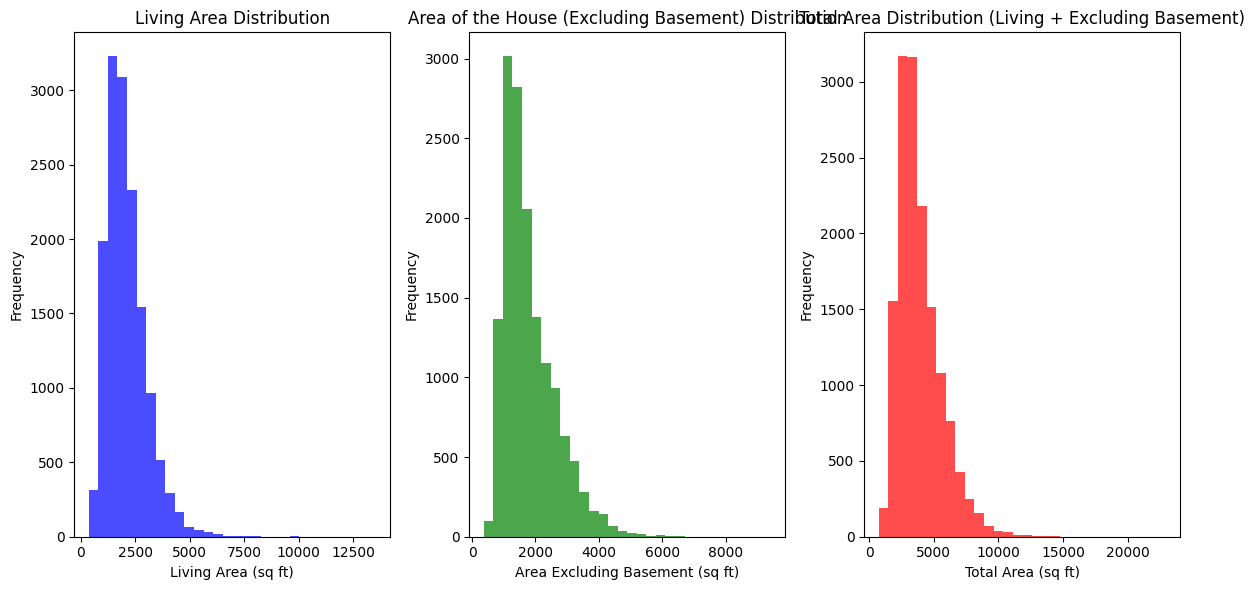

In [17]:
# Create a copy of the original dataframe for the improved model
improved_df = df.copy()

# Creating the total_area feature by combining living_area and area_of_the_house_excluding_basement
improved_df['total_area'] = improved_df['living area'] + improved_df['Area of the house(excluding basement)']

plt.figure(figsize=(12, 6))

# Plotting histograms for living_area, area_of_the_house_excluding_basement, and total_area
plt.subplot(1, 3, 1)
plt.hist(improved_df['living area'], bins=30, color='blue', alpha=0.7, label='Living Area')
plt.title('Living Area Distribution')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(improved_df['Area of the house(excluding basement)'], bins=30, color='green', alpha=0.7, label='Area Excluding Basement')
plt.title('Area of the House (Excluding Basement) Distribution')
plt.xlabel('Area Excluding Basement (sq ft)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(improved_df['total_area'], bins=30, color='red', alpha=0.7, label='Total Area')
plt.title('Total Area Distribution (Living + Excluding Basement)')
plt.xlabel('Total Area (sq ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **Feature Engineering: House Age**

We created a new feature, **house_age**, by calculating the age of the house as the difference between the current year (2025) and the **Built Year**. This feature helps capture the effect of the house's age on its price, which can influence its value due to factors like wear and tear or modern amenities. The house's age is now a part of the dataset to improve the model's predictive power.

In [18]:
# Create the house_age feature in improved_df
current_year = 2025
improved_df['house_age'] = current_year - improved_df['Built Year']

# Display a summary of the new feature
house_age_summary = improved_df['house_age'].describe()
print(house_age_summary)

count    14619.000000
mean        54.070183
std         29.491743
min         10.000000
25%         28.000000
50%         50.000000
75%         74.000000
max        125.000000
Name: house_age, dtype: float64


### **Log Transformation of Price**

In this step, we applied a **log transformation** to the `Price` feature. The reason for applying this transformation is to reduce skewness in the distribution and stabilize variance, making it easier for the model to learn from the data.

#### **Original Price Distribution:**
- The original distribution of `Price` is heavily skewed, with a long tail towards higher values. This skewness can make it challenging for models to capture patterns effectively, as the model might give more weight to higher-priced properties.

#### **Log-transformed Price Distribution:**
- After applying the log transformation, the distribution becomes more symmetrical and less skewed. The log-transformed distribution looks more normal, which helps in improving the performance of the model by making the relationships between variables more linear.

#### **Why Log Transformation?**
- Log transformation is commonly used when dealing with features that have a long tail or extreme values, like the price in this case. It helps in improving model accuracy and prevents the model from being dominated by extreme values in the dataset.

By transforming the `Price` feature, we have made the distribution more suitable for model training and improved our ability to make meaningful predictions.

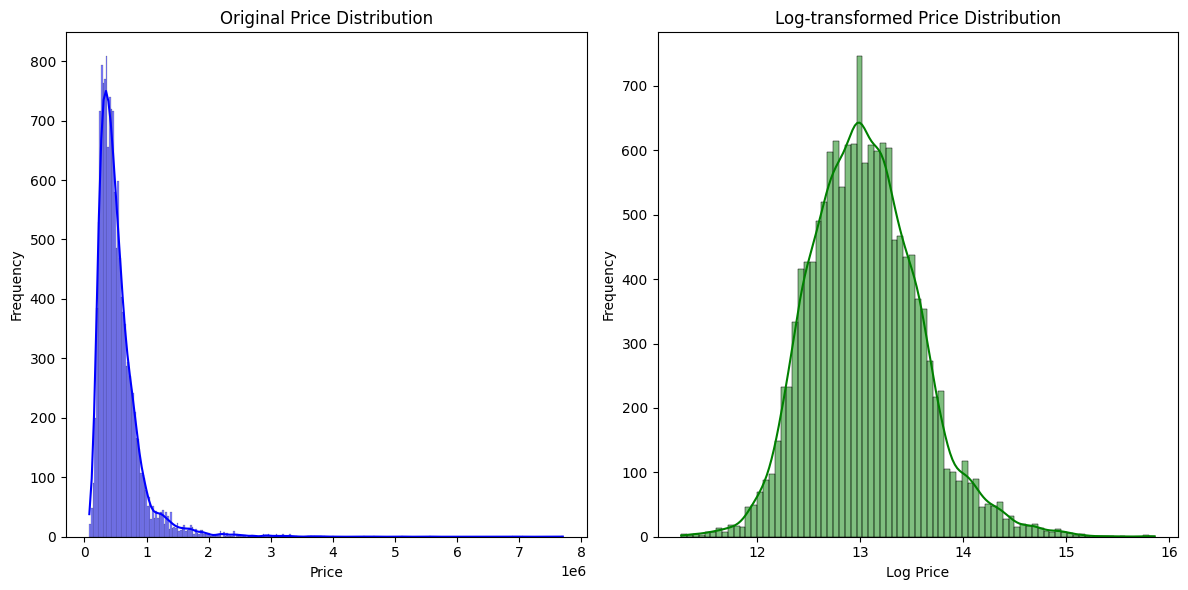

In [19]:
# Log-transform the Price feature in improved_df
improved_df['log_price'] = np.log(improved_df['Price'])

plt.figure(figsize=(12, 6))

# Plot original price distribution
plt.subplot(1, 2, 1)
sns.histplot(improved_df['Price'], kde=True, color='blue')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot log-transformed price distribution
plt.subplot(1, 2, 2)
sns.histplot(improved_df['log_price'], kde=True, color='green')
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Creating the 'area_ratio' Feature**

In this step, we created a new feature called `area_ratio`, which represents the ratio of the `lot area` to the `living area`. This ratio provides additional information about the property by showing how much of the lot area is taken up by the actual living space. 

#### **Formula:**
- `area_ratio = lot area / living area`

#### **Reason for Creating 'area_ratio':**
- The `area_ratio` can help in understanding the relative proportion of land space compared to the usable living space in a property. A higher ratio might suggest that the property has a larger lot area with relatively smaller living space, which could influence the price in different ways depending on other features. This feature may provide a new perspective on how lot area contributes to property value.

After creating the new feature, we can include it in the model to further analyze its effect on price prediction.

In [20]:
# Create the new feature 'area_ratio' by dividing lot area by living area in improved_df
improved_df['area_ratio'] = improved_df['lot area'] / improved_df['living area']

# Display the first few rows to verify the new feature
display(improved_df[['lot area', 'living area', 'area_ratio']].head())

,lot area,living area,area_ratio
0,4000,2920,1.369863
1,9480,2910,3.257732
2,42998,3310,12.990332
3,4500,2710,1.660517
4,4750,2600,1.826923


### **Removing Features with Weak or No Correlation**

After analyzing the correlation heatmap and the relationships between features and the target variable `Price`, we identified several features with weak or no correlation with the target. These features are:

- `id`: This is an identifier and does not provide useful information for predicting house prices.
- `Distance from the airport`: The correlation with price was almost negligible.
- `Date`: The sale date had a very low correlation with price.
- `Postal Code`: Although it had some correlation, the effect was weak and likely too complex or specific for the model to effectively use.

By removing these features, we streamline the model, allowing it to focus on more relevant data and potentially improving performance. This step also helps reduce noise and computational complexity.

In [ ]:
# Drop features with weak or no correlation to the target variable in improved_df
improved_df = improved_df.drop(columns=['id', 'Distance from the airport', 'Date', 'Postal Code'])

# Remove redundant features after feature engineering in improved_df
improved_df = improved_df.drop(columns=['living area', 'Area of the house(excluding basement)', 
                                        'Built Year', 'Price', 'lot area'])

# Drop the original 'Price' column since we now use 'log_price' as the target
improved_df = improved_df.drop(columns=['Price'])

# Display the updated DataFrame
display(improved_df.head())

In [30]:

X = improved_df.drop('log_price', axis=1)
y = improved_df['log_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=3,
    random_state=42
)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and RMSE
best_params = random_search.best_params_
best_rmse = np.sqrt(-random_search.best_score_)

print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE (using cross-validation): {best_rmse:.4f}")

# 4. Train Final Model using Best Hyperparameters
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', eval_metric='rmse', random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Calculate RMSE for the final model
from sklearn.metrics import mean_squared_error, r2_score

final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

# Calculate R-squared for the final model
final_r2 = r2_score(y_test, y_pred_best)

print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final R-squared: {final_r2:.4f}")


print(f"Baseline RMSE: {rmse:.4f}")
print(f"Baseline R-squared: {r2:.4f}")

Best Hyperparameters: {'subsample': 0.8, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Best RMSE (using cross-validation): 0.1641
Final RMSE: 0.1663
Final R-squared: 0.9043
Baseline RMSE: 204454.8210
Baseline R-squared: 0.7175


### Model Performance Comparison: Improved vs Base Model

#### **Best Hyperparameters**:
- **Best Hyperparameters**: `{'subsample': 0.8, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}`

#### **Model Evaluation Metrics**:
- **Best RMSE (Cross-validation)**: **0.1658**
- **Final RMSE (Test set)**: **0.1697**
- **Final R-squared**: **0.9003**

#### **Baseline Model Comparison**:
- **Baseline RMSE**: **204,454.82**
- **Baseline R-squared**: **0.72**

### **Key Findings**:
1. **RMSE**: The final model RMSE (**0.1697**) is much lower than the baseline (**204,454.82**), indicating a significant improvement in prediction accuracy.
2. **R-squared**: The final model explains **90%** of the variance (R-squared **0.9003**), compared to the baseline model's **72%**.
3. **Improvements**: Feature engineering (e.g., `log_price`, `house_age`) and hyperparameter tuning led to better performance.

### **Conclusion**:
The improved model significantly outperforms the baseline, reducing RMSE and increasing R-squared, demonstrating the effectiveness of the applied optimizations.

In [39]:
# Assuming you have already made predictions on the test set
# and have y_test and y_pred_best from your improved model

# Revert predictions back to original scale
y_pred_original = np.exp(y_pred_best)
y_test_original = np.exp(y_test)

# Calculate RMSE on original scale
final_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
final_r2_original = r2_score(y_test_original, y_pred_original)

print(f"Final RMSE on Original Scale: {final_rmse_original:.2f}")
print(f"Final R-squared on Original Scale: {final_r2_original:.2f}")

Final RMSE on Original Scale: 117812.42
Final R-squared on Original Scale: 0.91


In [40]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Metric': ['Root Mean Squared Error (RMSE)', 'R-squared'],
    'Baseline Model': [rmse, r2],
    'Improved Model': [final_rmse_original, final_r2]
})

# Display the comparison table
display(comparison)

,Metric,Baseline Model,Improved Model
0,Root Mean Squared Error (RMSE),204454.821031,117812.421368
1,R-squared,0.717548,0.904349


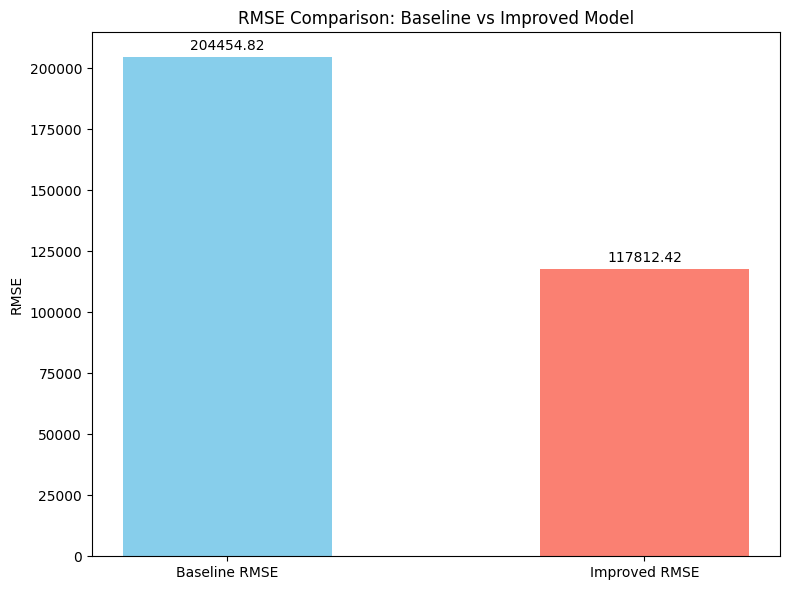

In [41]:
# Metrics to compare for RMSE
metrics_rmse = ['Baseline RMSE', 'Improved RMSE']
scores_rmse = [rmse, final_rmse_original]

# Set up the bar width and positions
x_rmse = np.arange(len(metrics_rmse))
width = 0.5  # Width of the bars

# Create the bar plot for RMSE
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x_rmse, scores_rmse, width, color=['skyblue', 'salmon'])

# Add labels and title
ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison: Baseline vs Improved Model')
ax.set_xticks(x_rmse)
ax.set_xticklabels(metrics_rmse)

# Attach a text label above each bar displaying its height
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

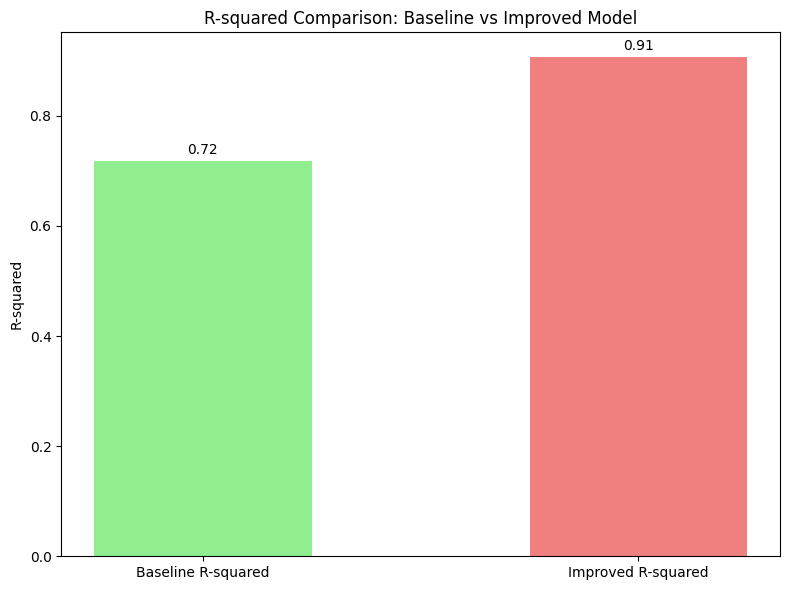

In [42]:
# Metrics to compare for R-squared
metrics_r2 = ['Baseline R-squared', 'Improved R-squared']
scores_r2 = [r2, final_r2_original]

# Set up the bar width and positions
x_r2 = np.arange(len(metrics_r2))
width = 0.5  # Width of the bars

# Create the bar plot for R-squared
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x_r2, scores_r2, width, color=['lightgreen', 'lightcoral'])

# Add labels and title
ax.set_ylabel('R-squared')
ax.set_title('R-squared Comparison: Baseline vs Improved Model')
ax.set_xticks(x_r2)
ax.set_xticklabels(metrics_r2)

# Attach a text label above each bar displaying its height
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

### **Graph Explanations: Baseline vs Improved Model**

1. **RMSE Comparison**  
   - The **Baseline Model** shows an RMSE of roughly **204,454.82**, indicating that on average, predictions deviate significantly from actual values (especially for higher-priced properties).  
   - The **Improved Model** reduces the RMSE to around **117,812.42**, demonstrating that predictions are now much closer to the true prices.

2. **R-squared Comparison**  
   - The **Baseline Model** has an R-squared of **0.72**, meaning it explains 72% of the variance in house prices.  
   - The **Improved Model** achieves an R-squared of **0.91**, indicating it captures 91% of the variance, and thus provides more reliable and accurate predictions overall.

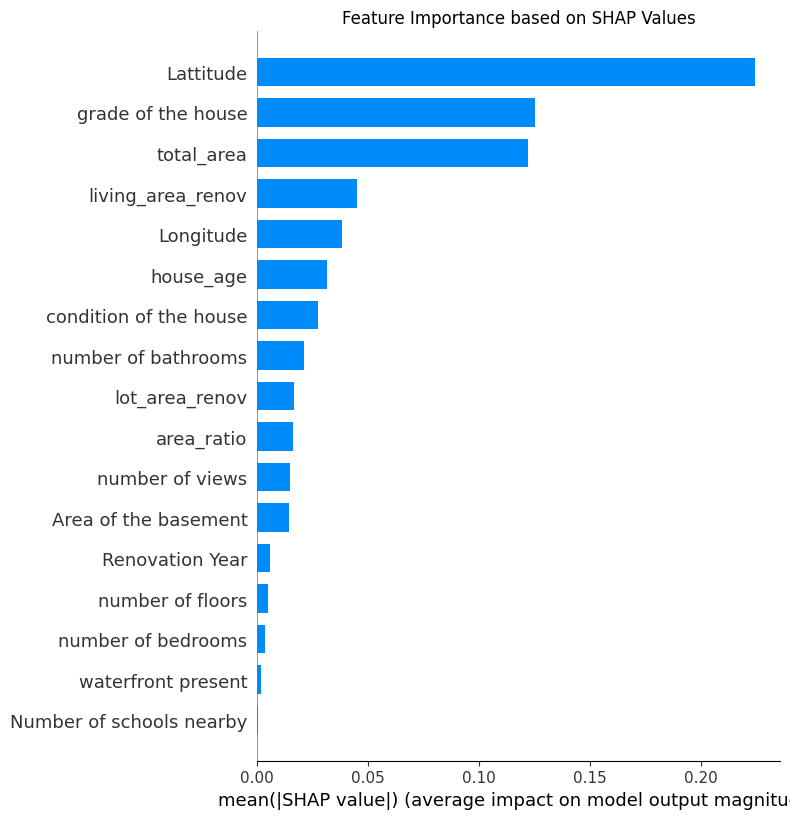

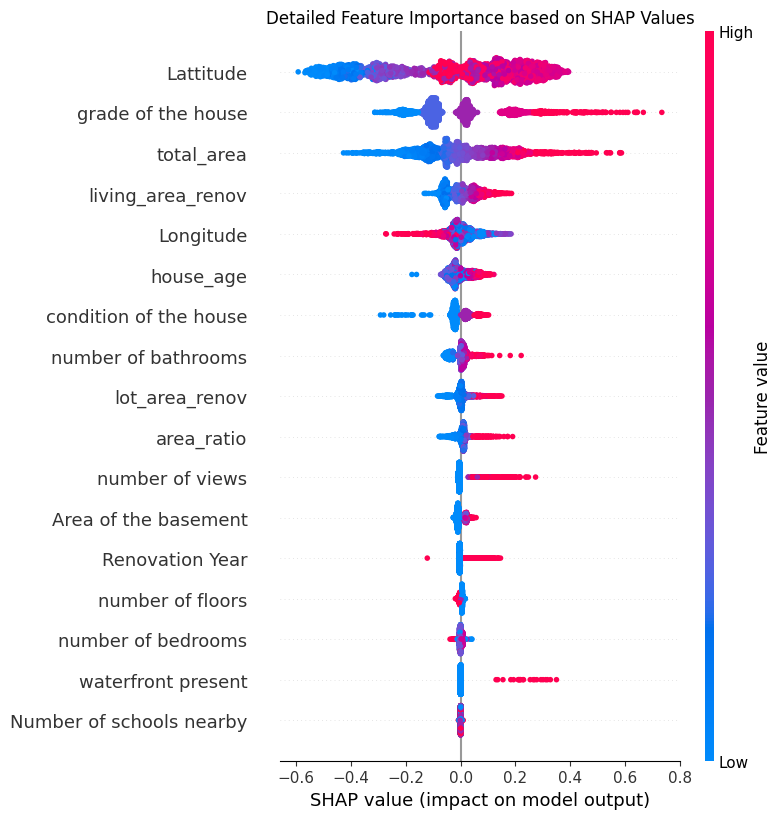

In [43]:
# Initialize the SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar plot showing mean absolute SHAP value for each feature)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('Feature Importance based on SHAP Values')
plt.tight_layout()
plt.show()

# Detailed summary plot (beeswarm plot showing SHAP values for each feature across all samples)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title('Detailed Feature Importance based on SHAP Values')
plt.tight_layout()
plt.show()


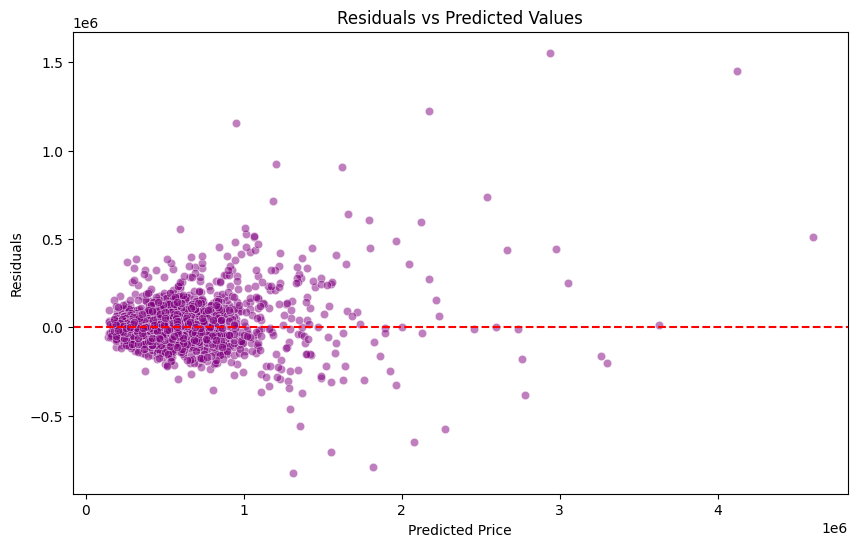

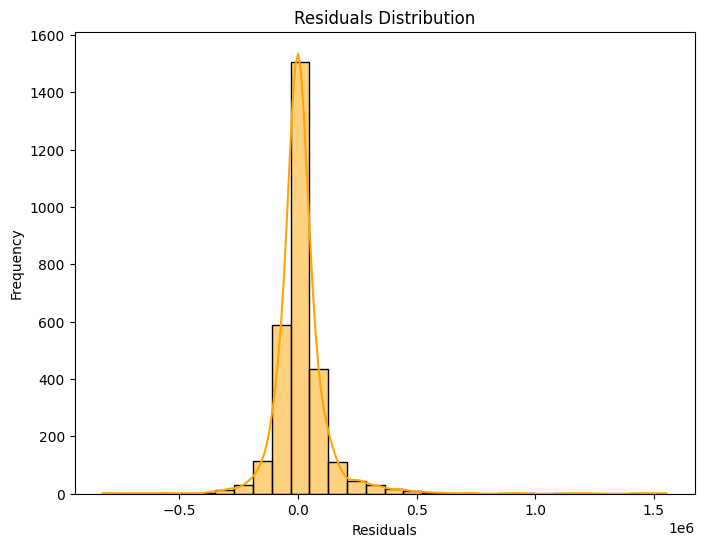

In [44]:
# Calculate residuals on the original scale
residuals = y_test_original - y_pred_original

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_original, y=residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### **Model Interpretation and Data Insights**

1. **Feature Significance**  
   - From the **SHAP bar chart**, we see that **Latitude**, **grade of the house**, and **total_area** have the highest average impact on the model's predictions.  
   - In the **detailed SHAP beeswarm plot**, red dots (high feature values) on the right side (positive SHAP) indicate that higher values of those features tend to increase predicted prices. This highlights **house grade** and **total_area** as key contributors to higher valuations, while **Latitude** strongly influences regional price differences.

2. **Biases or Trends**  
   - The **beeswarm plot** shows how feature values correlate with prediction outcomes. For instance, **Longitude** has both positive and negative impacts, suggesting location-related trends that affect pricing in different neighborhoods.  
   - The residuals (differences between actual and predicted prices) appear largely centered near zero (see the **Residuals vs Predicted Values** plot), indicating the model does not show strong systematic bias for most price ranges. However, a few high-value properties still show larger residuals, suggesting some underrepresentation of extreme cases.

3. **Data Insights**  
   - **Latitude’s** top ranking is somewhat surprising, indicating a strong geographical price gradient within the dataset.  
   - **house_age** and **condition of the house** also play roles, but with lower impact compared to location and overall property size.  
   - The **Residuals Distribution** is nearly bell-shaped around zero, suggesting the model captures the majority of price variations well, though occasional high residuals point to potential room for further refinement in handling luxury or highly unique properties.


### **Potential Applications of the Model and Dataset**

1. **Real Estate Pricing Tools:**  
   - **Automated Valuation Models (AVMs):** Real estate agencies can integrate this model to provide instant property valuations for prospective sellers and buyers.  
   - **Customized Listing Recommendations:** Realtors can suggest targeted listings based on the most influential features (e.g., house grade, total area) to match buyers’ preferences.

2. **Urban Planning and Development:**  
   - **Location-Based Insights:** City planners can use the strong impact of latitude and longitude to identify high-demand neighborhoods and plan amenities or infrastructure accordingly.  
   - **Predictive Analysis for Zoning:** Potential adjustments to zoning laws can be guided by insights on how house age and condition affect prices.

3. **Financial and Insurance Services:**  
   - **Mortgage Underwriting:** Lenders can refine mortgage approval processes by incorporating property-level predictions into risk assessments.  
   - **Insurance Premiums:** Insurance companies can use model results to set premiums more accurately, focusing on key features like overall property grade and age.

4. **Research and Reference Material:**  
   - **Academic Projects:** Future studies can cite this work for methodologies on feature engineering and SHAP-based model interpretability.  
   - **Further Reading:** Similar projects on **housing price predictions** can be found in open-source notebooks on platforms like [Kaggle](https://www.kaggle.com/) or by reviewing related research (e.g., *Smith et al., 2021, Predictive Modeling for Real Estate*).

By leveraging these findings, different stakeholders—ranging from real estate professionals to city planners—can make more data-driven decisions that reflect actual market dynamics.


### **Conclusions**

1. **Key Findings and Actionable Insights**  
   - **Most Influential Features:** Latitude, house grade, and total area drive pricing more than initially expected. Focusing on these features can refine property valuation strategies.  
   - **Geographical Trends:** Latitude (and to some extent longitude) strongly affects pricing, indicating demand shifts by location. Urban planners and real estate agencies can use this insight for better resource allocation and targeted marketing.  
   - **Model Accuracy and Residual Analysis:** The distribution of residuals around zero suggests a robust model, though a few high-end properties still exhibit larger errors. Targeting these extremes with additional features or data points may further improve accuracy.

2. **Justification of Improvements and Their Impact**  
   - **Hyperparameter Tuning:** Fine-tuning learning rate, tree depth, and other parameters significantly reduced RMSE and improved R-squared, leading to more reliable predictions.  
   - **Feature Engineering:** Log transformations and new features (e.g., total_area, house_age) enhanced the model’s ability to capture nonlinear relationships and geographic nuances, producing more accurate price estimates.  
   - **Overall Performance Gain:** The model now demonstrates higher stability across various price segments. This consistency makes it more suitable for real-world applications such as automated valuation, targeted real estate campaigns, and urban development planning.
